# Exploratory Analysis on Pokemon GO and the Main Series Games


In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr


In [69]:
df = pd.read_csv('comprehensive_dps.csv')

In [70]:
df.head()

,Pokemon,Fast Move,Charged Move,DPS,TDO,DPS^3*TDO,CP
0,Mega Mewtwo Y,Confusion,Psystrike,26.355,999.7,18299.9,5610
1,Mega Mewtwo Y,Psycho Cut,Psystrike,26.207,994.1,17893.2,5610
2,Mega Mewtwo X,Confusion,Psystrike,25.513,967.8,16073.1,5429
3,Shadow Mewtwo,Confusion,Psystrike,25.400,662.7,10859.6,4178
4,Mega Mewtwo X,Psycho Cut,Psystrike,25.380,962.8,15739.4,5429


In [71]:
df.rename(columns = {'DPS^3*TDO' : 'Battle_Stat'}, inplace = True)

In [72]:
df.head()

,Pokemon,Fast Move,Charged Move,DPS,TDO,Battle_Stat,CP
0,Mega Mewtwo Y,Confusion,Psystrike,26.355,999.7,18299.9,5610
1,Mega Mewtwo Y,Psycho Cut,Psystrike,26.207,994.1,17893.2,5610
2,Mega Mewtwo X,Confusion,Psystrike,25.513,967.8,16073.1,5429
3,Shadow Mewtwo,Confusion,Psystrike,25.400,662.7,10859.6,4178
4,Mega Mewtwo X,Psycho Cut,Psystrike,25.380,962.8,15739.4,5429


In [73]:
df.isnull().sum()

Pokemon         0
Fast Move       0
Charged Move    0
DPS             0
TDO             0
Battle_Stat     0
CP              0
dtype: int64

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13761 entries, 0 to 13760
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pokemon       13761 non-null  object 
 1   Fast Move     13761 non-null  object 
 2   Charged Move  13761 non-null  object 
 3   DPS           13761 non-null  float64
 4   TDO           13761 non-null  float64
 5   Battle_Stat   13761 non-null  float64
 6   CP            13761 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 752.7+ KB


In [177]:
df_best_attack_set = df.groupby('Pokemon').max('Battle_Stat')

In [178]:
df_best_attack_set.head()

,DPS,TDO,Battle_Stat,CP
Pokemon,,,,
Flabébé,7.460,99.2,41.2,1063
5th Anniversary Pikachu,8.366,81.2,47.5,938
Abomasnow,12.094,322.3,570.1,2362
Abra,11.707,85.1,136.5,1342
Absol,15.134,252.4,874.8,2526


In [179]:
df_best_attack_set = df_best_attack_set.merge(df, on='Pokemon', how='left')

In [180]:
df_best_attack_set.head()

,Pokemon,DPS_x,TDO_x,Battle_Stat_x,CP_x,Fast Move,Charged Move,DPS_y,TDO_y,Battle_Stat_y,CP_y
0,Flabébé,7.46,99.2,41.2,1063,Vine Whip,Dazzling Gleam,7.460,99.2,41.2,1063
1,Flabébé,7.46,99.2,41.2,1063,Tackle,Dazzling Gleam,7.300,97.1,37.8,1063
2,Flabébé,7.46,99.2,41.2,1063,Vine Whip,Psychic,6.797,90.4,28.4,1063
3,Flabébé,7.46,99.2,41.2,1063,Tackle,Psychic,6.613,88.0,25.4,1063
4,Flabébé,7.46,99.2,41.2,1063,Vine Whip,Petal Blizzard,6.071,80.8,18.1,1063


In [181]:
df_best_attack_set = df_best_attack_set[(df_best_attack_set['Battle_Stat_x'] == df_best_attack_set['Battle_Stat_y'])]


In [182]:
df_best_attack_set.head()

,Pokemon,DPS_x,TDO_x,Battle_Stat_x,CP_x,Fast Move,Charged Move,DPS_y,TDO_y,Battle_Stat_y,CP_y
0,Flabébé,7.460,99.2,41.2,1063,Vine Whip,Dazzling Gleam,7.460,99.2,41.2,1063
6,5th Anniversary Pikachu,8.366,81.2,47.5,938,Thunder Shock,Wild Charge,8.366,81.2,47.5,938
14,Abomasnow,12.094,322.3,570.1,2362,Razor Leaf,Weather Ball Ice,12.094,322.3,570.1,2362
24,Abra,11.707,85.1,136.5,1342,Zen Headbutt,Psyshock,11.707,85.1,136.5,1342
32,Absol,15.134,252.4,874.8,2526,Snarl,Return,15.134,252.4,874.8,2526


In [183]:
df_best_attack_set.drop(columns = ['DPS_y', 'TDO_y', 'Battle_Stat_y', 'CP_y'], inplace = True)

In [184]:
df_best_attack_set.rename(columns = {'DPS_x' : 'DPS', 'TDO_x' : 'TDO',
                                     'Battle_Stat_x' : 'Battle_Stat', 'CP_x' : 'Max_CP_Lv40',
                                    'Fast Move' : 'Fast_Move', 'Charged Move' : 'Charged_Move'}, inplace = True)

In [185]:
df_best_attack_set.head()

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move
0,Flabébé,7.460,99.2,41.2,1063,Vine Whip,Dazzling Gleam
6,5th Anniversary Pikachu,8.366,81.2,47.5,938,Thunder Shock,Wild Charge
14,Abomasnow,12.094,322.3,570.1,2362,Razor Leaf,Weather Ball Ice
24,Abra,11.707,85.1,136.5,1342,Zen Headbutt,Psyshock
32,Absol,15.134,252.4,874.8,2526,Snarl,Return


In [186]:
df_best_attack_set[df_best_attack_set.Pokemon == 'Pumpkaboo']

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move


In [187]:
def base_function(df_best_attack_set):
    x = input('Type a Pokemons name to find its best moveset.')
    result = df_best_attack_set[df_best_attack_set.Pokemon == x]
    print(result)


def find_best_moveset(df_best_attack_set):
    x = input('Type a Pokemons name to find its best moveset.')
    result = df_best_attack_set[df_best_attack_set.Pokemon == x]
    print(result)
    loop = 'active'
    while loop == 'active':
        choice = input('Would you like to check another Pokemon? Y/N')
        if choice == 'Y':
            base_function(df_best_attack_set)
        elif choice == 'N':
            print('Thank you have a great day!')
            break
        else:
            print('Please enter Y or N')

In [62]:
find_best_moveset(df_best_attack_set)

Type a Pokemons name to find its best moveset. Pumpkaboo - Super Size


                     Pokemon    DPS    TDO  Battle_Stat    CP   Fast_Move  \
7446  Pumpkaboo - Super Size  8.569  134.9         84.9  1250  Razor Leaf   

     Charged_Move  
7446   Grass Knot  


Would you like to check another Pokemon? Y/N Y
Type a Pokemons name to find its best moveset. Tyrunt


      Pokemon     DPS    TDO  Battle_Stat    CP    Fast_Move Charged_Move
13048  Tyrunt  10.603  168.6        200.9  1635  Dragon Tail  Dragon Claw


Would you like to check another Pokemon? Y/N Y
Type a Pokemons name to find its best moveset. Furret


     Pokemon    DPS    TDO  Battle_Stat    CP     Fast_Move Charged_Move
2625  Furret  9.834  203.5        193.5  1758  Quick Attack   Hyper Beam


Would you like to check another Pokemon? Y/N N


Thank you have a great day!


## What pokemon has the highest and lowest cp?

In [86]:
df_best_attack_set[df_best_attack_set.Max_CP_Lv40 == df_best_attack_set.Max_CP_Lv40.max()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move
2330,Eternamax Eternatus,14.836,2500.2,8164.7,8187,Dragon Tail,Hyper Beam


In [87]:
df_best_attack_set[df_best_attack_set.Max_CP_Lv40 == df_best_attack_set.Max_CP_Lv40.min()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move
2411,Feebas,2.333,16.2,0.2,274,Tackle,Mirror Coat
4791,Magikarp,1.630,11.3,0.0,274,Splash,Return
4792,Magikarp,1.630,11.3,0.0,274,Splash,Struggle
9794,Shadow Magikarp,1.336,7.7,0.0,274,Splash,Struggle
9795,Shadow Magikarp,1.336,7.7,0.0,274,Splash,Frustration


## Lets look at the S tier pokemon for attackers as determined by general consensus

In [114]:
S_tier_attackers = ['Kartana', 'Terrakion', 'Shadow Metagross', 'Shadow Machamp',
                    'Shadow Mewtwo', 'Shadow Salamence', 'Shadow Dragonite', 'Mega Latios',
                    'Mega Gengar', 'Mega Charizard Y', 'Shadow Mamoswine']

In [153]:
for x in S_tier_attackers:
    result = df_best_attack_set[df_best_attack_set.Pokemon == x]
    print(result)

      Pokemon     DPS    TDO  Battle_Stat  Max_CP_Lv40   Fast_Move  \
4092  Kartana  20.374  428.9       3627.7         3677  Razor Leaf   

     Charged_Move  
4092   Leaf Blade  
         Pokemon     DPS    TDO  Battle_Stat  Max_CP_Lv40    Fast_Move  \
12588  Terrakion  19.461  626.2       4615.8         3698  Double Kick   

       Charged_Move  
12588  Sacred Sword  
               Pokemon     DPS    TDO  Battle_Stat  Max_CP_Lv40     Fast_Move  \
9954  Shadow Metagross  21.763  627.0       6462.6         3791  Bullet Punch   

     Charged_Move  
9954  Meteor Mash  
             Pokemon    DPS    TDO  Battle_Stat  Max_CP_Lv40 Fast_Move  \
9745  Shadow Machamp  19.65  439.0       3330.3         3056   Counter   

       Charged_Move  
9745  Dynamic Punch  
            Pokemon   DPS    TDO  Battle_Stat  Max_CP_Lv40  Fast_Move  \
9972  Shadow Mewtwo  25.4  662.7      10859.6         4178  Confusion   

     Charged_Move  
9972    Psystrike  
                Pokemon     DPS    TDO  Bat

In [161]:
df_S_tier_attackers = df_best_attack_set[(df_best_attack_set.Pokemon == 'Kartana') | (df_best_attack_set.Pokemon == 'Terrakion') |
                  (df_best_attack_set.Pokemon == 'Shadow Metagross') | (df_best_attack_set.Pokemon == 'Shadow Machamp') |
                  (df_best_attack_set.Pokemon == 'Shadow Mewtwo') | (df_best_attack_set.Pokemon == 'Shadow Salamence') |
                  (df_best_attack_set.Pokemon == 'Shadow Dragonite') | (df_best_attack_set.Pokemon == 'Mega Latios') |
                  (df_best_attack_set.Pokemon == 'Shadow Gengar') | (df_best_attack_set.Pokemon == 'Mega Charizard Y') |
                  (df_best_attack_set.Pokemon == 'Shadow Mamoswine')]

In [162]:
df_S_tier_attackers

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move
4092,Kartana,20.374,428.9,3627.7,3677,Razor Leaf,Leaf Blade
5207,Mega Charizard Y,21.764,758.0,7814.8,4455,Fire Spin,Blast Burn
5387,Mega Latios,20.704,829.4,7360.9,5007,Dragon Breath,Psychic
8729,Shadow Dragonite,20.854,575.4,5218.5,3792,Dragon Tail,Outrage
9745,Shadow Machamp,19.650,439.0,3330.3,3056,Counter,Dynamic Punch
9855,Shadow Mamoswine,20.377,487.6,4125.6,3328,Mud Slap,Avalanche
9954,Shadow Metagross,21.763,627.0,6462.6,3791,Bullet Punch,Meteor Mash
9972,Shadow Mewtwo,25.400,662.7,10859.6,4178,Confusion,Psystrike
10739,Shadow Salamence,22.163,541.8,5898.5,3749,Dragon Tail,Outrage
12588,Terrakion,19.461,626.2,4615.8,3698,Double Kick,Sacred Sword


In [163]:
df_S_tier_attackers[df_S_tier_attackers.Battle_Stat == df_S_tier_attackers.Battle_Stat.max()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move
9972,Shadow Mewtwo,25.4,662.7,10859.6,4178,Confusion,Psystrike


In [164]:
df_S_tier_attackers[df_S_tier_attackers.Battle_Stat == df_S_tier_attackers.Battle_Stat.min()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move
9745,Shadow Machamp,19.65,439.0,3330.3,3056,Counter,Dynamic Punch


## What pokemon has the highest and lowest average battle stat between all of their move sets?

In [170]:
df.groupby('Pokemon').mean('Battle_Stat').nlargest(1, columns = 'Battle_Stat')

,DPS,TDO,Battle_Stat,CP
Pokemon,,,,
Mega Mewtwo Y,21.9695,833.38125,9380.23125,5610.0


In [171]:
df.groupby('Pokemon').mean('Battle_Stat').nsmallest(1, columns = 'Battle_Stat')

,DPS,TDO,Battle_Stat,CP
Pokemon,,,,
Magikarp,1.381,9.6,0.0,274.0


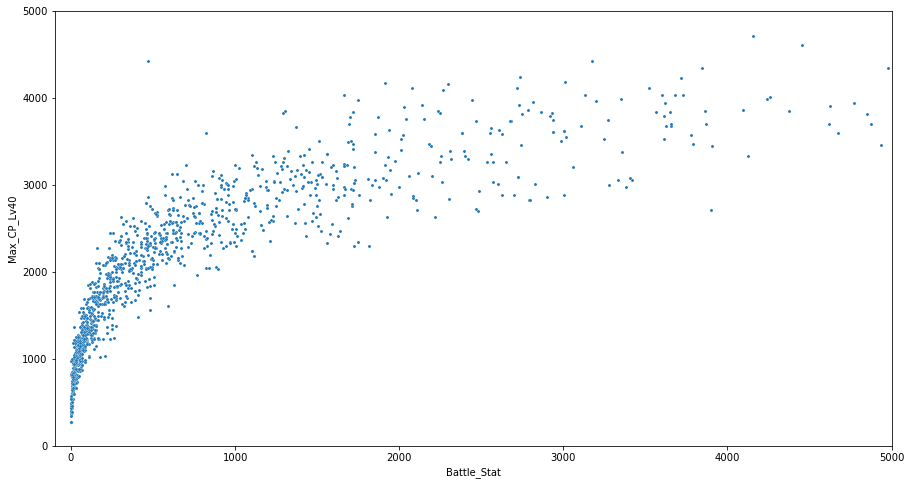

In [274]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_best_attack_set, x = 'Battle_Stat', y = 'Max_CP_Lv40', s=10)
plt.xlim(-100, 5000)
plt.ylim(0, 5000)
plt.show()

(array([1.144e+03, 1.180e+02, 2.900e+01, 1.400e+01, 7.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([    0.  ,  1829.99,  3659.98,  5489.97,  7319.96,  9149.95,
        10979.94, 12809.93, 14639.92, 16469.91, 18299.9 ]),
 <BarContainer object of 10 artists>)

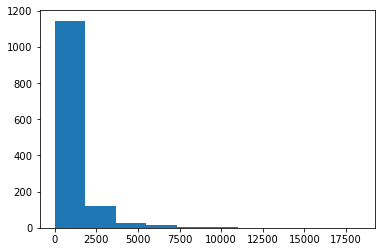

In [275]:
plt.hist(df_best_attack_set.Battle_Stat)


(array([267., 329., 345., 247.,  99.,  21.,   8.,   0.,   0.,   1.]),
 array([ 274. , 1065.3, 1856.6, 2647.9, 3439.2, 4230.5, 5021.8, 5813.1,
        6604.4, 7395.7, 8187. ]),
 <BarContainer object of 10 artists>)

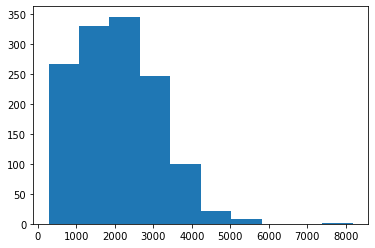

In [276]:
plt.hist(df_best_attack_set.Max_CP_Lv40)


In [278]:
corr, p = spearmanr(df_best_attack_set['Battle_Stat'], df_best_attack_set['Max_CP_Lv40'])
print(corr, p)

0.9657505245075169 0.0


## Looking at new csv for info from the other pokemon games


In [172]:
df1 = pd.read_csv('Pokemon.csv')

In [173]:
df1.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Lets join our 2 dataframes

In [188]:
df_best_attack_set.head()

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move
0,Flabébé,7.460,99.2,41.2,1063,Vine Whip,Dazzling Gleam
6,5th Anniversary Pikachu,8.366,81.2,47.5,938,Thunder Shock,Wild Charge
14,Abomasnow,12.094,322.3,570.1,2362,Razor Leaf,Weather Ball Ice
24,Abra,11.707,85.1,136.5,1342,Zen Headbutt,Psyshock
32,Absol,15.134,252.4,874.8,2526,Snarl,Return


In [175]:
df1.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [176]:
df1.rename(columns = {'Name' : 'Pokemon'}, inplace = True)

In [190]:
df_best_attack_set = df_best_attack_set.merge(df1, on='Pokemon', how='left')

In [191]:
df_best_attack_set.head()

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Flabébé,7.460,99.2,41.2,1063,Vine Whip,Dazzling Gleam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5th Anniversary Pikachu,8.366,81.2,47.5,938,Thunder Shock,Wild Charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abomasnow,12.094,322.3,570.1,2362,Razor Leaf,Weather Ball Ice,460.0,Grass,Ice,494.0,90.0,92.0,75.0,92.0,85.0,60.0,4.0,False
3,Abra,11.707,85.1,136.5,1342,Zen Headbutt,Psyshock,63.0,Psychic,NaN,310.0,25.0,20.0,15.0,105.0,55.0,90.0,1.0,False
4,Absol,15.134,252.4,874.8,2526,Snarl,Return,359.0,Dark,NaN,465.0,65.0,130.0,60.0,75.0,60.0,75.0,3.0,False


In [194]:
df_best_attack_set.shape

(1317, 19)

In [192]:
df_best_attack_set.isnull().sum()

Pokemon           0
DPS               0
TDO               0
Battle_Stat       0
Max_CP_Lv40       0
Fast_Move         0
Charged_Move      0
#               509
Type 1          509
Type 2          899
Total           509
HP              509
Attack          509
Defense         509
Sp. Atk         509
Sp. Def         509
Speed           509
Generation      509
Legendary       509
dtype: int64

## How do we handle nulls?

### This is tricky because the nulls need to be filled with specific data for each pokemon. The null is occuring because of all the unique pokemon names in pokemon go. (ex. 5th Anniversary Pikachu) In the main series pokemon games there is just 'Pikachu'. 

### I'm first going to export it into a CSV to get a better look at all the data.

In [195]:
df_best_attack_set.to_csv('Best_Attack_Set.csv')

### It apears the CSV's used are outdated I will manually adjust nulls as many names and stats are wrong and dated. From there I will reimport an updated CSV.

## While I work on the updated CSV on the side lets look at some of the data from the main series games.

In [196]:
df1.head()

,#,Pokemon,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [199]:
avg_stats_by_primary_type = df1.groupby('Type 1').mean()

In [201]:
avg_stats_by_primary_type.head()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824


In [222]:
avg_stats_by_primary_type_total = avg_stats_by_primary_type.sort_values('Total', ascending=False)

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

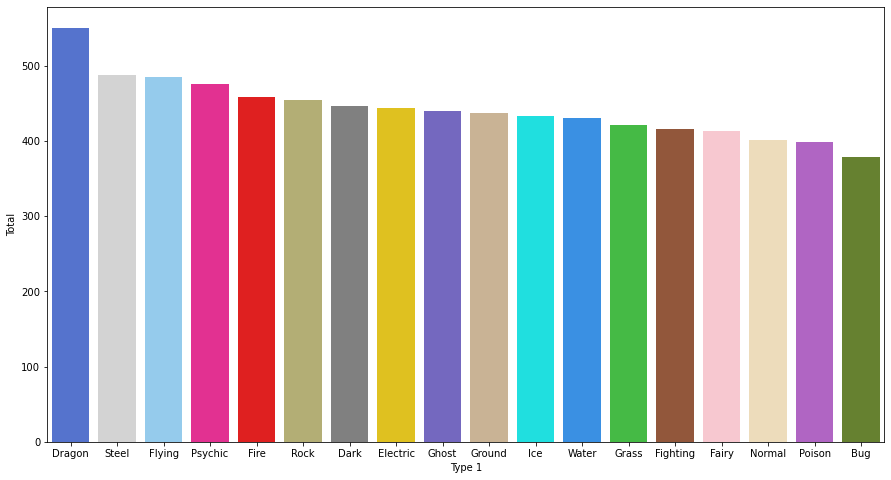

In [316]:
plt.figure(figsize=(15, 8))
sns.barplot(x = avg_stats_by_primary_type_total.index, y = avg_stats_by_primary_type_total.Total,
           palette = ['royalblue', 'lightgray', 'lightskyblue', 'deeppink', 'red', 'darkkhaki', 'grey',
                      'gold', 'slateblue', 'tan', 'aqua', 'dodgerblue', 'limegreen', 'sienna',
                      'pink', 'wheat', 'mediumorchid', 'olivedrab'])

In [ ]:
avg_stats_by_primary_type_attack = avg_stats_by_primary_type.sort_values('Attack', ascending=False)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

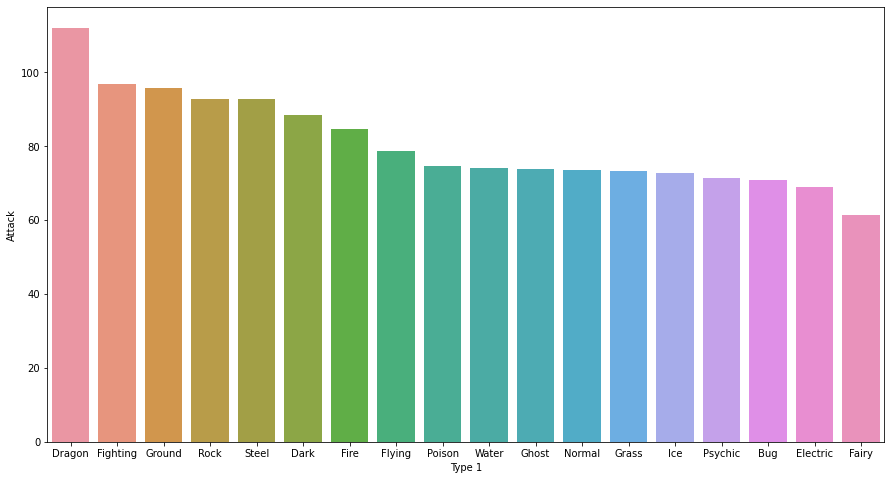

In [318]:
plt.figure(figsize=(15, 8))
sns.barplot(x = avg_stats_by_primary_type_attack.index, y = avg_stats_by_primary_type_attack.Attack)

In [224]:
avg_stats_by_primary_type_hp = avg_stats_by_primary_type.sort_values('HP', ascending=False)

<AxesSubplot:xlabel='Type 1', ylabel='HP'>

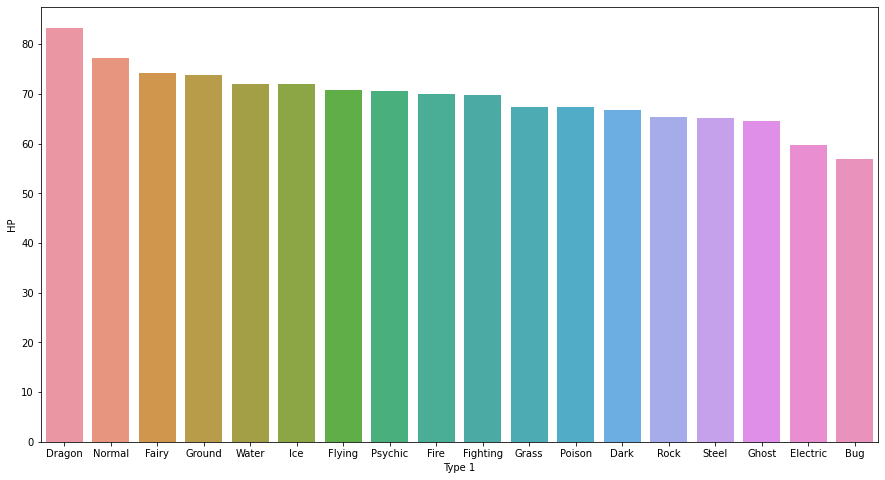

In [225]:
plt.figure(figsize=(15, 8))
sns.barplot(x = avg_stats_by_primary_type_hp.index, y = avg_stats_by_primary_type_hp.HP)

In [226]:
avg_stats_by_primary_type_defense = avg_stats_by_primary_type.sort_values('Defense', ascending=False)

<AxesSubplot:xlabel='Type 1', ylabel='Defense'>

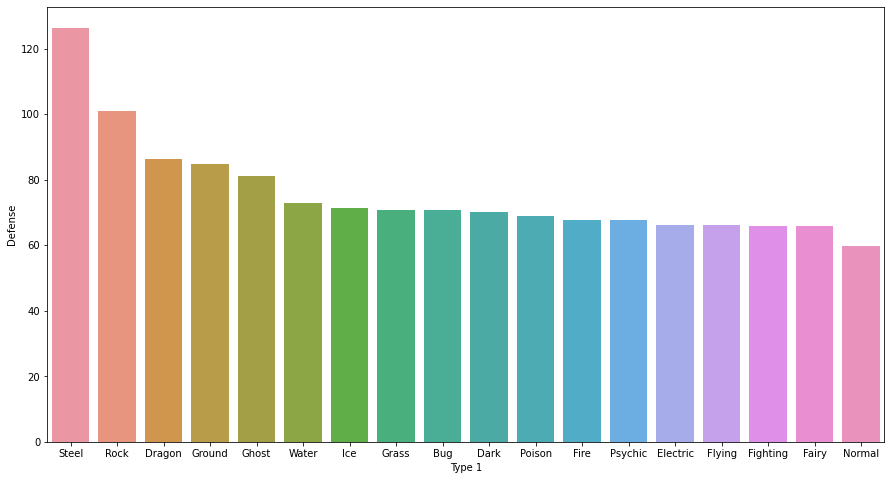

In [227]:
plt.figure(figsize=(15, 8))
sns.barplot(x = avg_stats_by_primary_type_defense.index, y = avg_stats_by_primary_type_defense.Defense)

In [228]:
avg_stats_by_primary_type_sp_attack = avg_stats_by_primary_type.sort_values('Sp. Atk', ascending=False)

<AxesSubplot:xlabel='Type 1', ylabel='Sp. Atk'>

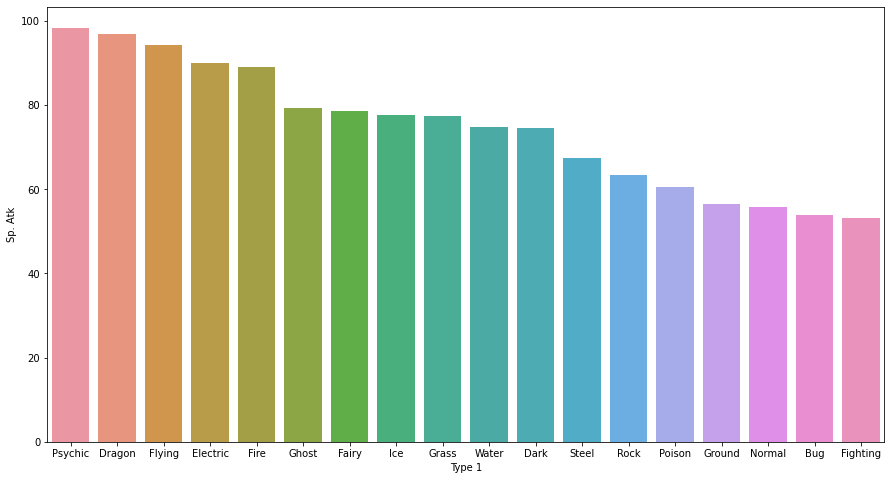

In [229]:
plt.figure(figsize=(15, 8))
sns.barplot(x = avg_stats_by_primary_type_sp_attack.index, y = avg_stats_by_primary_type_sp_attack['Sp. Atk'])

In [230]:
avg_stats_by_primary_type_sp_defense = avg_stats_by_primary_type.sort_values('Sp. Def', ascending=False)

<AxesSubplot:xlabel='Type 1', ylabel='Sp. Def'>

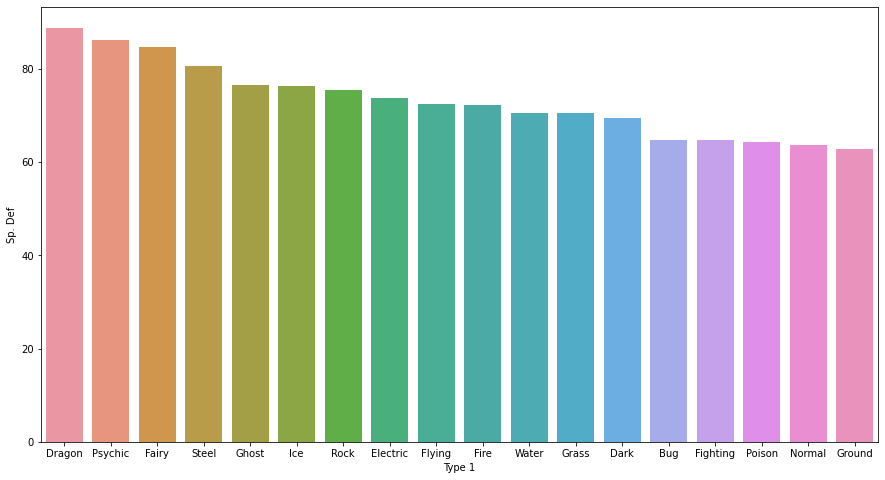

In [231]:
plt.figure(figsize=(15, 8))
sns.barplot(x = avg_stats_by_primary_type_sp_defense.index, y = avg_stats_by_primary_type_sp_defense['Sp. Def'])

In [232]:
avg_stats_by_primary_type_speed = avg_stats_by_primary_type.sort_values('Speed', ascending=False)

<AxesSubplot:xlabel='Type 1', ylabel='Speed'>

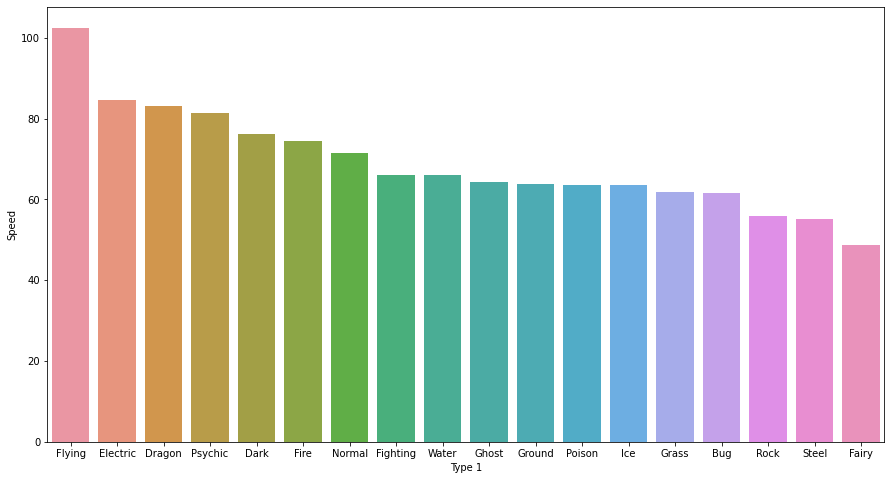

In [233]:
plt.figure(figsize=(15, 8))
sns.barplot(x = avg_stats_by_primary_type_speed.index, y = avg_stats_by_primary_type_speed.Speed)

## Lets look at Fire vs Water

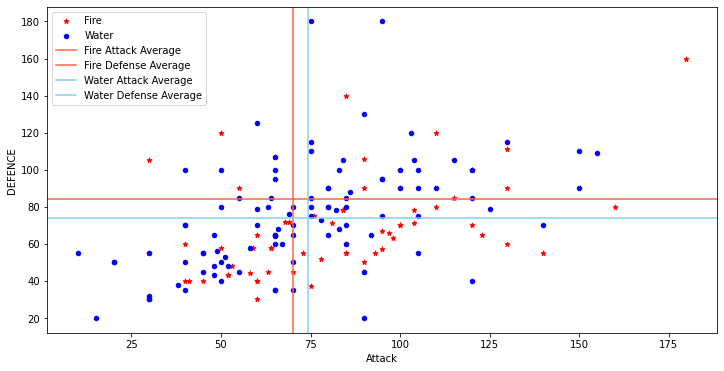

In [246]:
fire=df1[(df1['Type 1']=='Fire') | ((df1['Type 2'])=="Fire")] 
water=df1[(df1['Type 1']=='Water') | ((df1['Type 2'])=="Water")]
plt.scatter(fire.Attack.head(100),fire.Defense.head(100),c='red',label='Fire',marker="*",s=25)
plt.scatter(water.Attack.head(100),water.Defense.head(100),c='blue',label="Water",s=20)
plt.xlabel("Attack")
plt.ylabel("Defense")
fire_avg_attack = fire.Attack.mean()
fire_avg_defense = fire.Defense.mean()
plt.axhline(fire_avg_attack, label='Fire Attack Average', c = 'tomato')
plt.axvline(fire_avg_defense, label='Fire Defense Average', c = 'tomato')
water_avg_attack = water.Attack.mean()
water_avg_defense = water.Defense.mean()
plt.axhline(water_avg_attack, label='Water Attack Average', c = 'skyblue')
plt.axvline(water_avg_defense, label='Water Defense Average', c = 'skyblue')
plt.legend()
plt.plot()
fig=plt.gcf()  #get the current figure using .gcf()
fig.set_size_inches(12,6) #set the size for the figure
plt.show()

## Dragon vs Bug (Highest avg total stats vs lowest avg total stats)

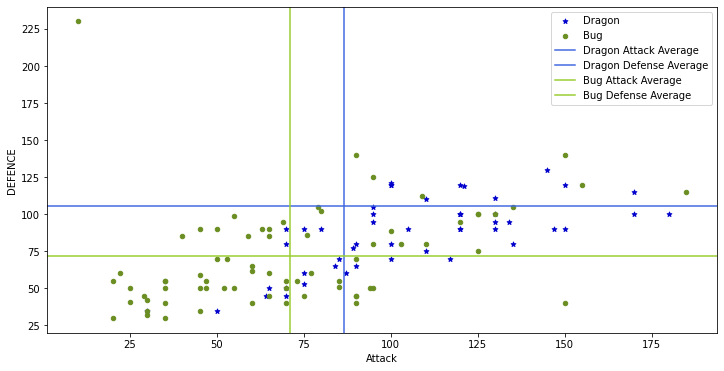

In [247]:
dragon=df1[(df1['Type 1']=='Dragon') | ((df1['Type 2'])=="Dragon")] 
bug=df1[(df1['Type 1']=='Bug') | ((df1['Type 2'])=="Bug")]
plt.scatter(dragon.Attack.head(100),dragon.Defense.head(100),c='mediumblue',label='Dragon',marker="*",s=25)
plt.scatter(bug.Attack.head(100),bug.Defense.head(100),c='olivedrab',label="Bug",s=20)
plt.xlabel("Attack")
plt.ylabel("Defense")
dragon_avg_attack = dragon.Attack.mean()
dragon_avg_defense = dragon.Defense.mean()
plt.axhline(dragon_avg_attack, label='Dragon Attack Average', c = 'royalblue')
plt.axvline(dragon_avg_defense, label='Dragon Defense Average', c = 'royalblue')
bug_avg_attack = bug.Attack.mean()
bug_avg_defense = bug.Defense.mean()
plt.axhline(bug_avg_attack, label='Bug Attack Average', c = 'yellowgreen')
plt.axvline(bug_avg_defense, label='Bug Defense Average', c = 'yellowgreen')
plt.legend()
plt.plot()
fig=plt.gcf()  #get the current figure using .gcf()
fig.set_size_inches(12,6) #set the size for the figure
plt.show()

## Lets look at stats by gen

In [248]:
avg_stats_by_gen = df1.groupby('Generation').mean()

In [249]:
avg_stats_by_gen.head()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,,
1,75.819277,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,0.036145
2,202.283019,418.283019,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321,0.047170
3,321.968750,436.225000,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000,0.112500
4,442.446281,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843,0.107438
5,574.272727,434.987879,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788,0.090909


In [251]:
df1.head()

,#,Pokemon,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<AxesSubplot:xlabel='Type 1', ylabel='Total'>

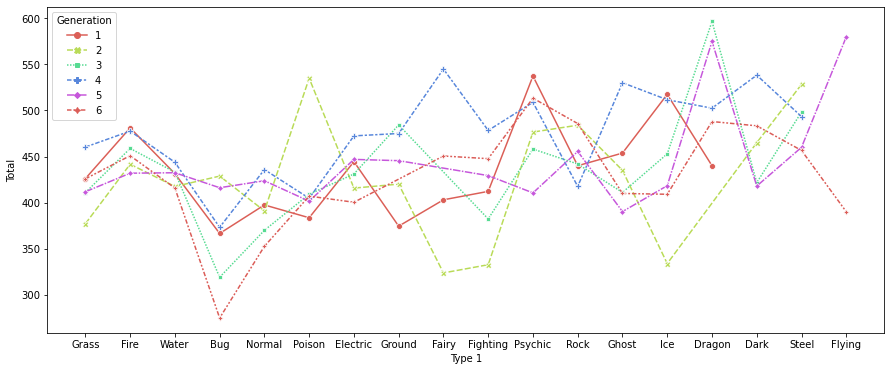

In [265]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df1, x="Type 1", y="Total", hue="Generation", ci=None, palette='hls', style="Generation", markers=True)


<AxesSubplot:xlabel='Type 2', ylabel='Total'>

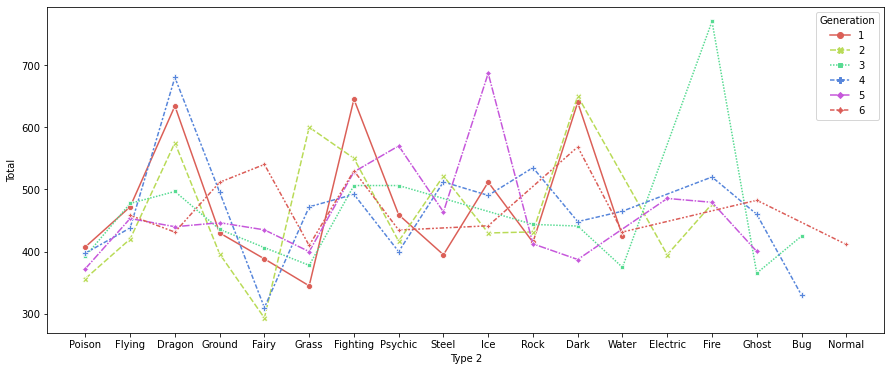

In [266]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df1, x="Type 2", y="Total", hue="Generation", ci=None, palette='hls', style="Generation", markers=True)


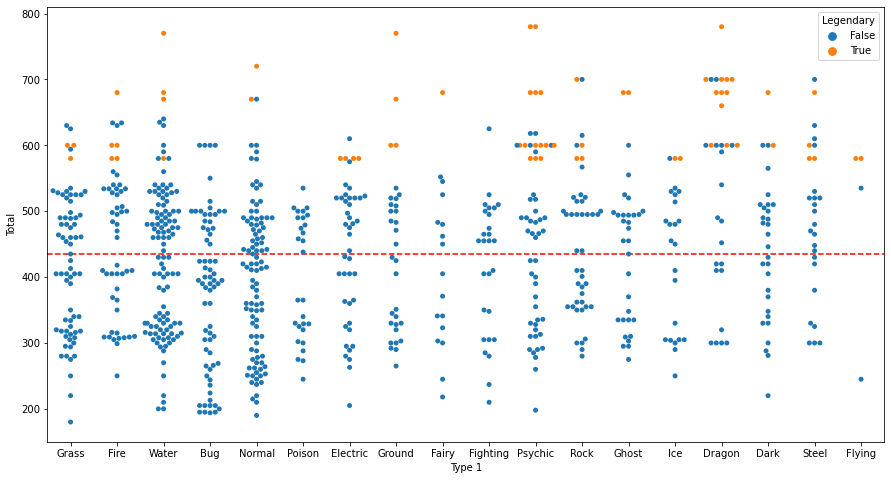

In [281]:
plt.figure(figsize=(15,8))
sns.swarmplot(x='Type 1',y='Total',data=df1,hue='Legendary') # this plot shows the points belonging to individual pokemons
plt.axhline(df1['Total'].mean(),color='red',linestyle='dashed')
plt.show()

In [320]:
df1.head()

,#,Pokemon,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


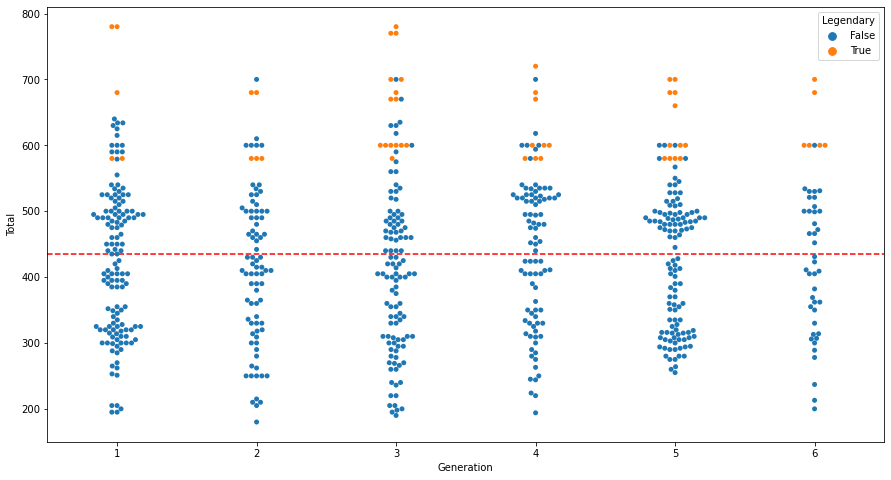

In [323]:
plt.figure(figsize=(15,8))
top_types=df1['Type 1'].value_counts()[:10] #take the top 10 Types
df3=df1[df1['Type 1'].isin(top_types.index)] #take the pokemons of the type with highest numbers, top 10
sns.swarmplot(x='Generation',y='Total',data=df3,hue='Legendary') # this plot shows the points belonging to individual pokemons
# It is distributed by Type
plt.axhline(df3['Total'].mean(),color='red',linestyle='dashed')
plt.show()

In [287]:
df1['Type 1'].value_counts(normalize= True).round(3)*100

Water       14.0
Normal      12.2
Grass        8.8
Bug          8.6
Psychic      7.1
Fire         6.5
Electric     5.5
Rock         5.5
Dragon       4.0
Ground       4.0
Ghost        4.0
Dark         3.9
Poison       3.5
Steel        3.4
Fighting     3.4
Ice          3.0
Fairy        2.1
Flying       0.5
Name: Type 1, dtype: float64

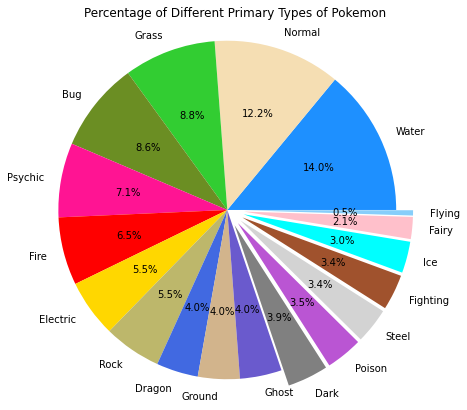

In [313]:
#define data
labels = ['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Dragon', 'Ground',
          'Ghost', 'Dark', 'Poison', 'Steel', 'Fighting', 'Ice', 'Fairy', 'Flying']

data = [14.0, 12.2, 8.8, 8.6, 7.1, 6.5, 5.5, 5.5, 4.0, 4.0, 4.0, 3.9, 3.5, 3.4, 3.4, 3.0, 2.1, 0.5]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1)  # only "explode" the 3rd slice 

#define Seaborn color palette to use
# colors = sns.color_palette('pastel')[0:18]
colors = ['dodgerblue', 'wheat', 'limegreen', 'olivedrab', 'deeppink', 'red', 'gold', 'darkkhaki', 'royalblue',
         'tan', 'slateblue', 'grey', 'mediumorchid', 'lightgray', 'sienna', 'aqua', 'pink', 'lightskyblue']

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%', explode=explode)
plt.axis('equal')
plt.title("Percentage of Different Primary Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()


In [294]:
df1['Type 2'].value_counts(normalize= True).round(3)*100

Flying      23.4
Ground       8.5
Poison       8.2
Psychic      8.0
Fighting     6.3
Grass        6.0
Fairy        5.6
Steel        5.3
Dark         4.8
Dragon       4.3
Water        3.4
Ghost        3.4
Ice          3.4
Rock         3.4
Fire         2.9
Electric     1.4
Normal       1.0
Bug          0.7
Name: Type 2, dtype: float64

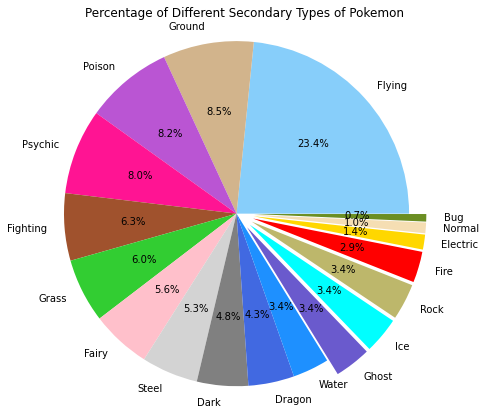

In [314]:
#define data
labels = ['Flying', 'Ground', 'Poison', 'Psychic', 'Fighting', 'Grass', 'Fairy', 'Steel', 'Dark', 'Dragon',
          'Water', 'Ghost', 'Ice', 'Rock', 'Fire', 'Electric', 'Normal', 'Bug']

data = [23.4, 8.5, 8.2, 8.0, 6.3, 6.0, 5.6, 5.3, 4.8, 4.3, 3.4, 3.4, 3.4, 3.4, 2.9, 1.4, 1.0, 0.7]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1)  # only "explode" the 3rd slice 

#define Seaborn color palette to use
# colors = sns.color_palette('pastel')[0:18]
colors = ['lightskyblue', 'tan', 'mediumorchid', 'deeppink', 'sienna', 'limegreen', 'pink', 'lightgray', 'grey', 'royalblue',
         'dodgerblue', 'slateblue', 'aqua', 'darkkhaki', 'red', 'gold', 'wheat', 'olivedrab']

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%', explode=explode)
plt.axis('equal')
plt.title("Percentage of Different Secondary Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()


## There's new data for pokemon go, lets read in the new CSV

In [297]:
df2 = pd.read_csv('comprehensive_dps_updated.csv')

In [298]:
df2.head()

,Pokemon,Fast Move,Charged Move,DPS,TDO,ER,CP
0,Mega Mewtwo Y,Confusion,Psystrike,26.355,999.7,65.41,5610
1,Mega Mewtwo Y,Psycho Cut,Psystrike,26.207,994.1,65.04,5610
2,Mega Mewtwo X,Confusion,Psystrike,25.513,967.8,63.32,5429
3,Shadow Mewtwo,Confusion,Psystrike,25.400,662.7,57.41,4178
4,Mega Mewtwo X,Psycho Cut,Psystrike,25.380,962.8,62.99,5429


In [299]:
df2.rename(columns = {'ER' : 'Battle_Stat'}, inplace = True)

## The old battle stat column used to use a value from the DPS^3*TDO. However it was recently determined that a new metric called ER(Equivalent Rating) is a better representation of the battle potential of a pokemon. This value is calculated from the 4th power root of DPS^3*TDO. This was found by Reddit user u/Elastic_Space

## For sake of convience I will still be calling the column Battle_Stat for matching my exsisting code

In [300]:
df_best_attack_set = df2.groupby('Pokemon').max('Battle_Stat')

In [301]:
df_best_attack_set = df_best_attack_set.merge(df2, on='Pokemon', how='left')
df_best_attack_set = df_best_attack_set[(df_best_attack_set['Battle_Stat_x'] == df_best_attack_set['Battle_Stat_y'])]
df_best_attack_set.drop(columns = ['DPS_y', 'TDO_y', 'Battle_Stat_y', 'CP_y'], inplace = True)
df_best_attack_set.rename(columns = {'DPS_x' : 'DPS', 'TDO_x' : 'TDO',
                                     'Battle_Stat_x' : 'Battle_Stat', 'CP_x' : 'Max_CP_Lv40',
                                    'Fast Move' : 'Fast_Move', 'Charged Move' : 'Charged_Move'}, inplace = True)

In [303]:
df_best_attack_set.head()

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move
0,Flabébé,7.460,99.2,14.25,1063,Vine Whip,Dazzling Gleam
6,5th Anniversary Pikachu,8.366,81.2,14.77,938,Thunder Shock,Wild Charge
14,Abomasnow,12.094,322.3,27.48,2362,Razor Leaf,Weather Ball Ice
24,Abra,11.707,85.1,19.22,1342,Zen Headbutt,Psyshock
32,Absol,15.134,252.4,30.58,2526,Snarl,Return


In [304]:
df_best_attack_set.isnull().sum()

Pokemon         0
DPS             0
TDO             0
Battle_Stat     0
Max_CP_Lv40     0
Fast_Move       0
Charged_Move    0
dtype: int64

In [305]:
df_S_tier_attackers = df_best_attack_set[(df_best_attack_set.Pokemon == 'Kartana') | (df_best_attack_set.Pokemon == 'Terrakion') |
                  (df_best_attack_set.Pokemon == 'Shadow Metagross') | (df_best_attack_set.Pokemon == 'Shadow Machamp') |
                  (df_best_attack_set.Pokemon == 'Shadow Mewtwo') | (df_best_attack_set.Pokemon == 'Shadow Salamence') |
                  (df_best_attack_set.Pokemon == 'Shadow Dragonite') | (df_best_attack_set.Pokemon == 'Mega Latios') |
                  (df_best_attack_set.Pokemon == 'Shadow Gengar') | (df_best_attack_set.Pokemon == 'Mega Charizard Y') |
                  (df_best_attack_set.Pokemon == 'Shadow Mamoswine')]

In [306]:
df_S_tier_attackers[df_S_tier_attackers.Battle_Stat == df_S_tier_attackers.Battle_Stat.max()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move
9972,Shadow Mewtwo,25.4,662.7,57.41,4178,Confusion,Psystrike


In [307]:
df_S_tier_attackers[df_S_tier_attackers.Battle_Stat == df_S_tier_attackers.Battle_Stat.min()]

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move
9745,Shadow Machamp,19.65,439.0,42.72,3056,Counter,Dynamic Punch


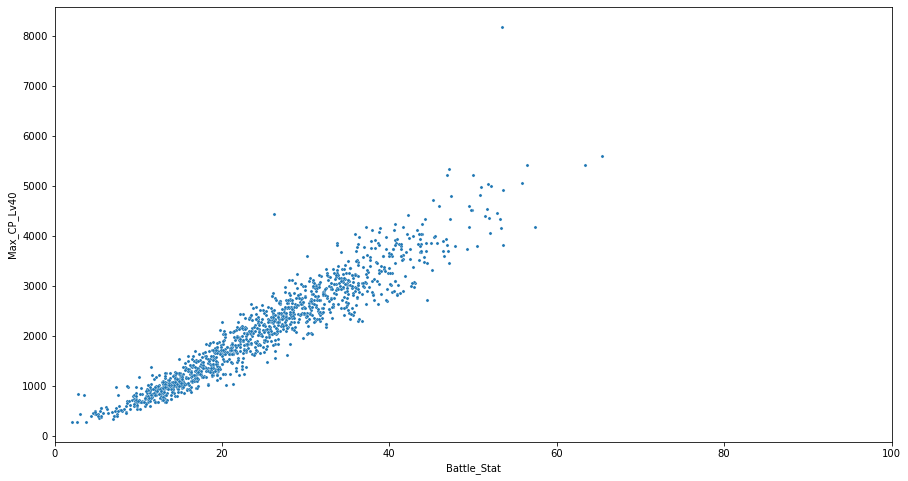

In [312]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_best_attack_set, x = 'Battle_Stat', y = 'Max_CP_Lv40', s=10)
plt.xlim(0, 100)
plt.show()